<a href="https://colab.research.google.com/github/orlandojsjunior/Data_Science-explorando_e_analisando_dados/blob/main/Explorando_e_analisando_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [213]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [214]:
import pandas as pd

In [215]:
notas = pd.read_csv("https://raw.githubusercontent.com/orlandojsjunior/Data_Science-explorando_e_analisando_dados/main/Dados/ratings.csv")
notas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [216]:
notas.shape

(100836, 4)

In [217]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [218]:
notas["nota"].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [219]:
notas["nota"].value_counts()

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [220]:
notas["nota"].mean()

3.501556983616962

<Axes: ylabel='Frequency'>

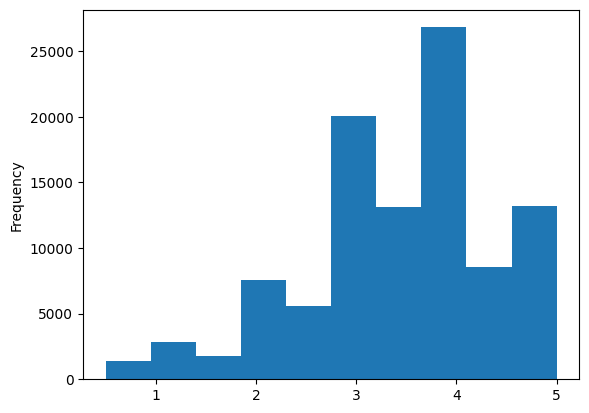

In [221]:
notas["nota"].plot(kind='hist')

In [222]:
notas["nota"].median()

3.5

In [223]:
mediana = notas["nota"].median()
media = notas["nota"].mean()
print(f"Mediana é {mediana}")
print(f"Média é {media}")

Mediana é 3.5
Média é 3.501556983616962


In [224]:
notas["nota"].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [225]:
%pip install seaborn==0.13.1

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\orlan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='nota'>

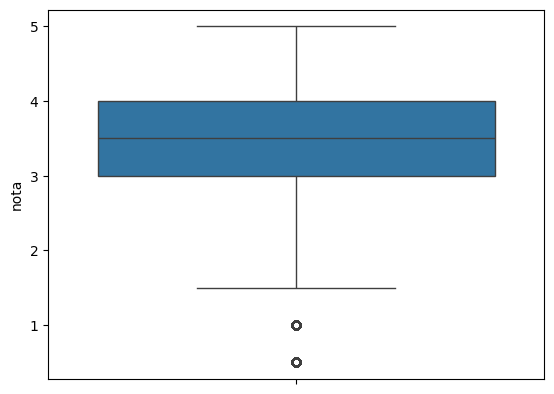

In [226]:
import seaborn as sns

sns.boxplot(notas["nota"])

# Filmes

In [227]:
filmes = pd.read_csv("https://raw.githubusercontent.com/orlandojsjunior/Data_Science-explorando_e_analisando_dados/main/Dados/movies.csv")
filmes.columns = ["filmeId", "titulo", "genero"]
filmes

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [228]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [229]:
notas.query("filmeId == 1")["nota"].mean()


3.9209302325581397

In [230]:
notas.query("filmeId == 2")["nota"].mean()

3.4318181818181817

In [231]:
notas.groupby("filmeId")

In [232]:
notas.groupby("filmeId")["nota"].mean()

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [233]:
medias_por_filme = notas.groupby("filmeId")["nota"].mean()
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

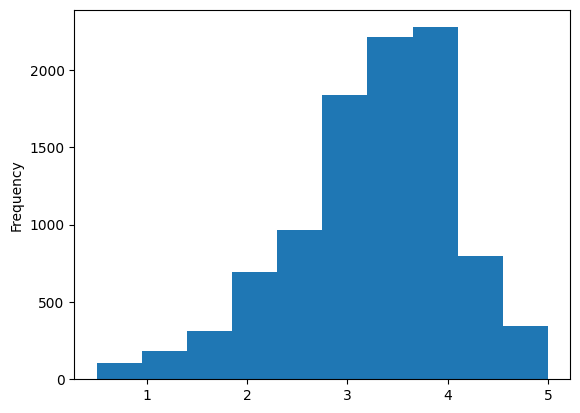

In [234]:
medias_por_filme.plot(kind="hist")

# Distribuindo as médias dos filmes

In [235]:
import seaborn as sns

In [236]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

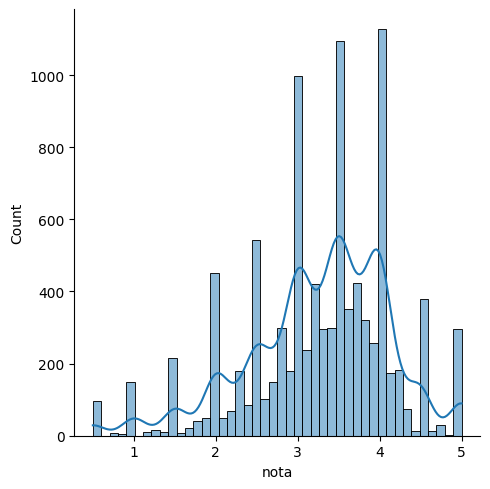

In [237]:
sns.displot(medias_por_filme,kde=True)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

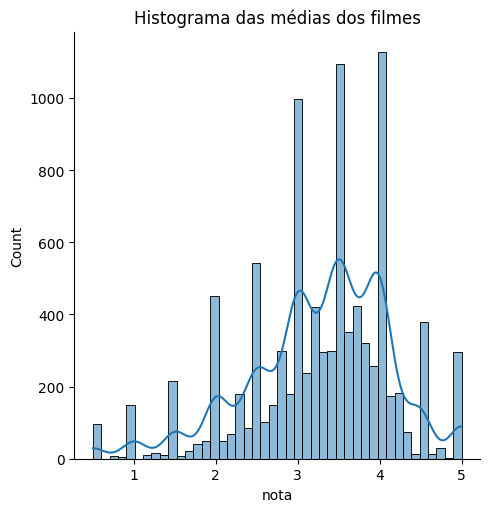

In [238]:
import matplotlib.pyplot as plt

sns.displot(medias_por_filme, kde=True)
plt.title("Histograma das médias dos filmes")


# Faça como eu fiz: analisando os dados dos filmes

Vamos iniciar fazendo uma nova importação dos dados, desta vez, copiando e colando o link do GitHub da base com o nome dos filmes separados pelo ID e os gêneros, alterando o nome das colunas e lendo os primeiros cinco valores:

In [239]:
filmes = pd.read_csv("https://raw.githubusercontent.com/orlandojsjunior/Data_Science-explorando_e_analisando_dados/main/Dados/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Desta base, vamos nos concentrar na análise dos 2 primeiros filmes “Toy Story” e “Jumanji” chamando-os por meio de seus IDs na base notas que criamos na aula anterior. Para isso, vamos ler a média das notas de cada um dos 2 filmes utilizando o método query():

In [240]:
notas.query("filmeId==1")["nota"].mean() # Média das notas de Toy Story
notas.query("filmeId==2")["nota"].mean()	 # Média das notas de Jumanji

3.4318181818181817

Agora, vamos calcular média de todos filmes individualmente, agrupando-os por meio do método groupby() e utilizando como fórmula de agregação de dados o mean().

In [241]:
medias_por_filme = notas.groupby("filmeId")["nota"].mean()
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

Vamos observar agora a distribuição das médias por filme? Criaremos um histograma e um boxplot, separadamente para esse processo:

<Axes: ylabel='Frequency'>

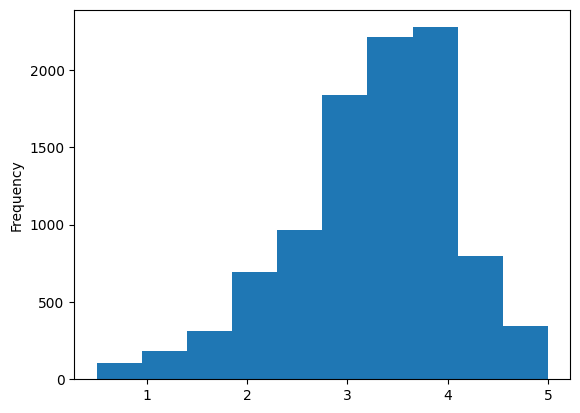

In [242]:
medias_por_filme.plot(kind="hist")

c:\Users\orlan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='nota'>

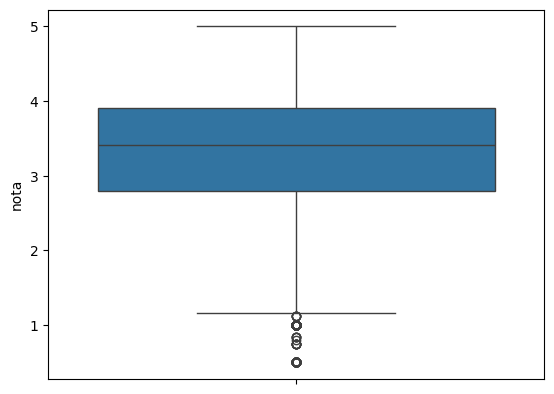

In [243]:
sns.boxplot(medias_por_filme)

Por fim, para conseguirmos observar os dados que o boxplot apresenta, vamos ler o resumo dos dados com o describe().

In [244]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

### Pronto, agora é com você! Como podemos criar um histograma das médias dos filmes com a biblioteca Seaborn? E adicionar um título em nosso visual?

Text(0.5, 1.0, 'Histograma das médias dos filmes')

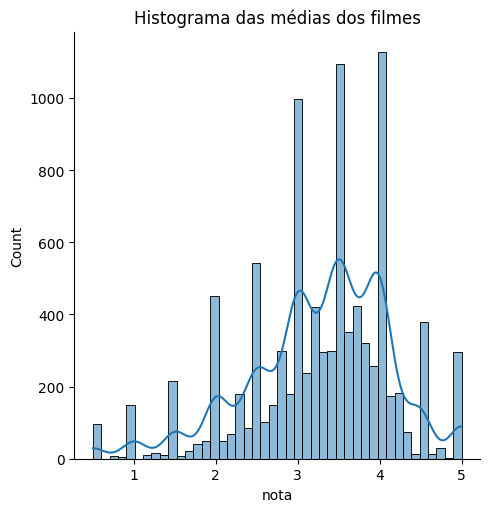

In [245]:
import matplotlib.pyplot as plt

sns.displot(medias_por_filme, kde=True)
plt.title("Histograma das médias dos filmes")

# Aula 3 - Atividade 2 - Explorando a base do TMDB

In [246]:
tmdb = pd.read_csv("https://raw.githubusercontent.com/orlandojsjunior/Data_Science-explorando_e_analisando_dados/main/Dados/tmdb_5000_movies.csv")
                    
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


 ### Alguns dados que figuram na base são:

- budget: o valor do orçamento do filme;
- genres: os gêneros do filme;
- homepage: a página do filme na internet;
- id: identificação do filme;
- keywords: as palavras-chave associadas ao filme.

In [247]:
tmdb.shape

(4803, 20)

## Distribuição da receita dos filmes

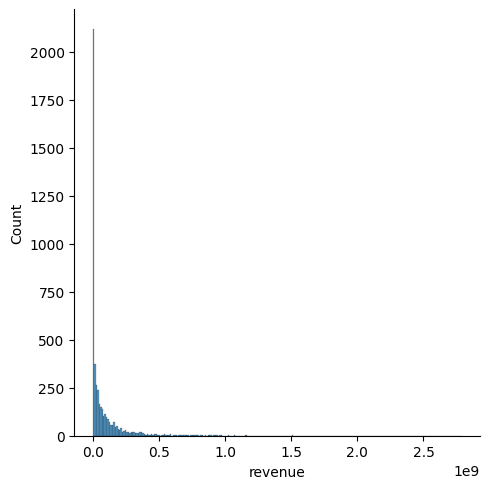

In [248]:
sns.displot(tmdb["revenue"])

Text(0.5, 1.0, 'Distribuição da receita dos filmes')

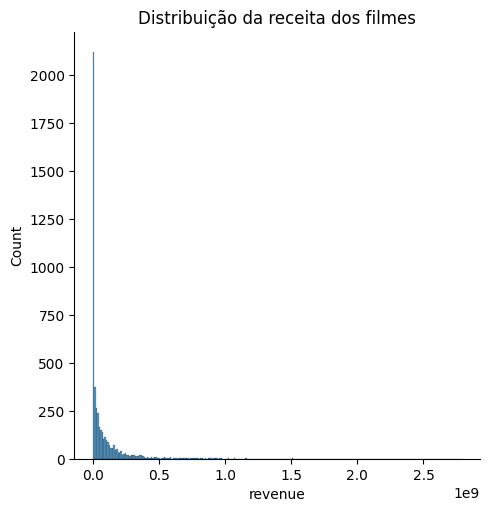

In [249]:
sns.displot(tmdb["revenue"])
plt.title("Distribuição da receita dos filmes")

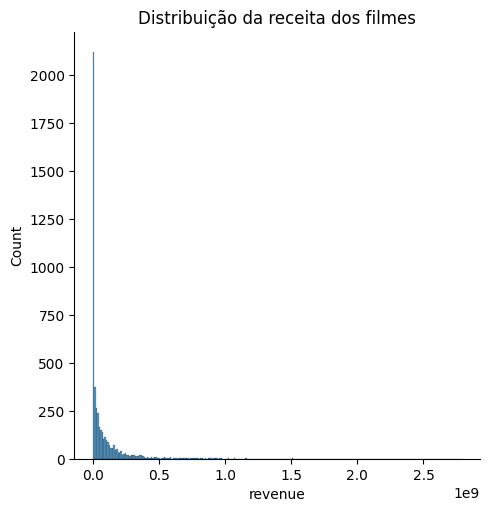

In [250]:
sns.displot(tmdb["revenue"])
plt.title("Distribuição da receita dos filmes")
plt.show()

## Distribuição do orçamento dos filmes

#### Gráfico de distribuição do orçamento dos filmes (budget)

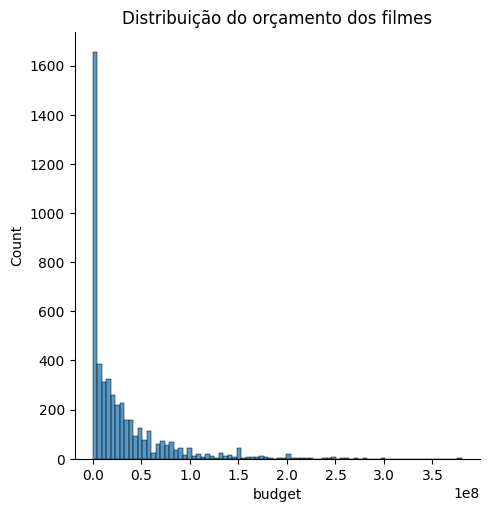

In [251]:
import matplotlib.pyplot as plt

sns.displot(tmdb["budget"])
plt.title("Distribuição do orçamento dos filmes")
plt.show()

In [252]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [253]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


## Pesquisa sobre o faturamento

In [254]:
tmdb.query("revenue < 500")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
83,27000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,79698,[],en,The Lovers,The Lovers is an epic romance time travel adve...,2.418535,"[{""name"": ""Corsan"", ""id"": 7299}, {""name"": ""Bli...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2015-02-13,0,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Love is longer than life.,The Lovers,4.8,34
135,150000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 27, ""name...",http://www.thewolfmanmovie.com/,7978,"[{""id"": 494, ""name"": ""father son relationship""...",en,The Wolfman,"Lawrence Talbot, an American man on a visit to...",21.214571,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-02-11,0,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,When the moon is full the legend comes to life,The Wolfman,5.5,549
265,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...",NaN,10588,"[{""id"": 977, ""name"": ""cat""}, {""id"": 1155, ""nam...",en,The Cat in the Hat,Conrad and Sally Walden are home alone with th...,18.251129,"[{""name"": ""Imagine Entertainment"", ""id"": 23}, ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2003-11-21,0,82.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Don't mess with the hat.,The Cat in the Hat,4.9,366
309,84000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 35, ""na...",NaN,10214,"[{""id"": 1009, ""name"": ""baby""}, {""id"": 2546, ""n...",en,Son of the Mask,"Tim Avery, an aspiring cartoonist, finds himse...",17.815595,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2005-02-18,0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Who's next?,Son of the Mask,3.6,338
376,90000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",NaN,10357,"[{""id"": 1552, ""name"": ""subway""}, {""id"": 2859, ...",en,Volcano,An earthquake shatters a peaceful Los Angeles ...,19.836124,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-04-25,0,104.0,"[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}, {""iso...",Released,The coast is toast,Volcano,5.2,376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",NaN,67238,[],en,Cavite,"Adam, a security guard, travels from Californi...",0.022173,[],[],2005-03-12,0,80.0,[],Released,NaN,Cavite,7.5,2
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7


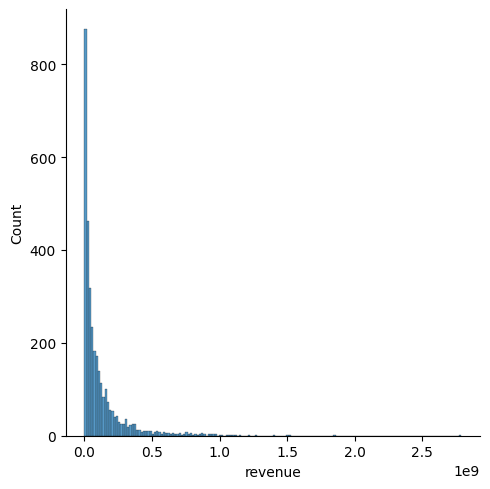

In [255]:
com_faturamento = tmdb.query("revenue > 0")
sns.displot(com_faturamento["revenue"])
plt.show()

# Aula 3 - Atividade 4 Tipos de variáveis

### Línguas originais de um filme

In [256]:
tmdb['original_language']

0       en
1       en
2       en
3       en
4       en
        ..
4798    es
4799    en
4800    en
4801    en
4802    en
Name: original_language, Length: 4803, dtype: object

In [257]:
tmdb['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [258]:
tmdb['original_language'].value_counts()

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

## Variáveis categóricas e numéricas

### Podemos classificar tipos de variáveis como numéricas (quantitativa) ou categóricas (qualitativa).

A categórica pode ser um número, como a nota, mas também pode ser um texto. E existem diversas formas de trabalhar com essas variáveis.

Para exemplificar, a variável do **budget**, que é o orçamento, dá uma quantidade. Portanto, ela é uma **variável quantitativa** - e não qualitativa.

Além disso, ela tem uma ordem, pois vai do orçamento mais barato ao mais caro, ou seja, do menor para o maior. Então, ela é uma quantitativa que tem uma ordem e também é contínua. O orçamento poderia ser 357, mas também poderia ser 1.400.000. Poderia ser qualquer número.

Em suma, ela é quantitativa contínua, pois pode assumir qualquer valor no intervalo possível.

Nesse sentido, o orçamento não é infinitamente contínuo, porque não pode assumir valores mais infinito ou menos infinito. Afinal, não faz sentido o orçamento ser negativo. Contudo, a variável é considerada contínua, porque pode assumir todos esses valores.

Em contrapartida, a nota era uma categoria. As notas do Movie Lens variava entre 0.5 a 5. Isto é, você tem que escolher entre uma dessas, por isso, é considerada categórica.

Outra variável interessante é a quantidade de votos, que seria a soma de votos. Essa variável pode assumir valores 1, 2, 3, 4 e 5 e, portanto, não é contínua, porque não existe 2.5. É, no mínimo, estranho dizer que as pessoas tiveram em média 2.5 votos.

Quando uma variável não é contínua, não usamos a média. Nesses casos, podemos usar a mediana. Podemos dizer que mediana de votos nos filmes é 3. Isso quer dizer que metade dos filmes tiveram menos de 3 votos, metade dos filmes tiveram mais de 3 votos.

### Conclusão

É importante entender que existem tipos de variáveis e precisamos tratá-los de maneiras diferentes.

Para um orçamento, faz todo sentido calcular a média e a mediana. Dificilmente terá sentido falar de moda, porque cada orçamento será completamente diferente do outro.

Já para a nota do Movie Lens faz todo sentido falar de moda, porque você tem que escolher uma dessas categorias. Também faz sentido saber a mediana, que divide metade de metade. A média, apesar de ter algumas restrições, também é possível.

Em contrapartida, não faz sentido falar de média para a quantidade de votos. Só de mediana e moda.

Lembrando que é muito importante saber se essas variáveis tem ordem ou não. Nesses casos, todas elas têm ordem de menor e maior. Mas, a língua original é uma variável categórica sem ordem. Por padrão, ela não tem ordem. Não estamos falando de uma ordem alfabética.

Enquanto a língua original é uma categórica sem ordem, a nota do Movie Lens é uma categórica com ordem.

É importante sabermos os tipos de variáveis para sabermos o que podemos fazer com esses dados. Vamos trabalhar com eles daqui a pouco.

### Pronto, agora é com você! 

Como podemos filtrar os dados para gerarmos um visual com a distribuição da média das notas do TMDB (vote_average) em que o número de votos (vote_count) seja maior que 10?

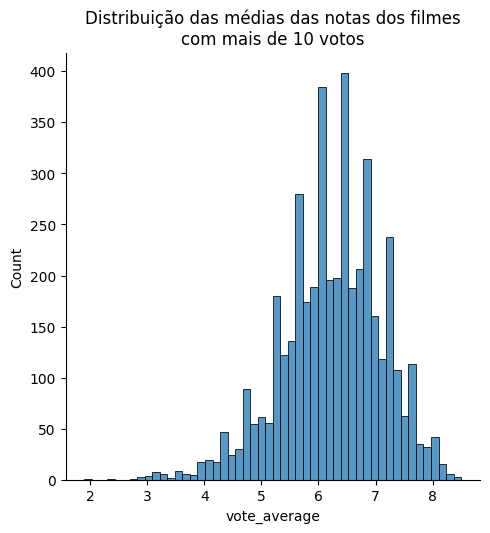

In [259]:
import matplotlib.pyplot as plt
mais_de_10_votos = tmdb.query("vote_count > 10")
sns.displot(mais_de_10_votos["vote_average"])
plt.title("Distribuição das médias das notas dos filmes\ncom mais de 10 votos")
plt.show()

# Aula 4 - Atividade 2 - Visualizando gráficos por categorias

### Análise inicial
No tmdb, tínhamos a coluna original_language, que nos fornecia informações sobre os idiomas. Ao aplicarmos o método .value_counts(), obtivemos a contagem de cada idioma em uma única série.

In [260]:
# O método .value_counts() retorna uma série com a contagem de valores únicos. 
# Essa série é ordenada em ordem decrescente, de modo que o primeiro elemento é o valor mais frequente. 
# Além disso, ele exclui automaticamente os valores NA (ausentes).

tmdb["original_language"].value_counts()

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

### Decomposição dos resultados
Portanto, toda vez que usamos o .value_counts(), podemos decompor os resultados em índices, usando .index(), ou valores, usando .values().

In [261]:
tmdb["original_language"].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object', name='original_language')

In [262]:
tmdb["original_language"].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1], dtype=int64)

### Transformação em dataframe
Agora, se desejamos plotar essas contagens de alguma forma, precisamos transformar esses resultados em duas colunas separadas. Não queremos mais apenas uma série, mas sim uma tabela, um dataframe. Para isso, usamos o método .to_frame().

In [263]:
tmdb["original_language"].value_counts().to_frame()

,count
original_language,
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12


### Correção de nomes e índices
Ele realizou a transformação, porém, atribuiu um nome incorreto à coluna de contagem, chamando-a de original_language. Além disso, o dataframe resultante ainda mantém um índice, que antes era numerado (0, 1, 2, 3, 4, 5 etc), e agora são códigos como en, fr etc. Para corrigir isso, vamos usar o método .reset_index().

In [264]:
tmdb["original_language"].value_counts().to_frame().reset_index()

,original_language,count
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


In [265]:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


### Visualização gráfica
Ao usar contagem_de_lingua.plot(), observamos um gráfico de linha com valor alto no início, que seria 4505, e vários outros valores baixos, plotando a coluna total. Mas não é o que queremos.

<Axes: >

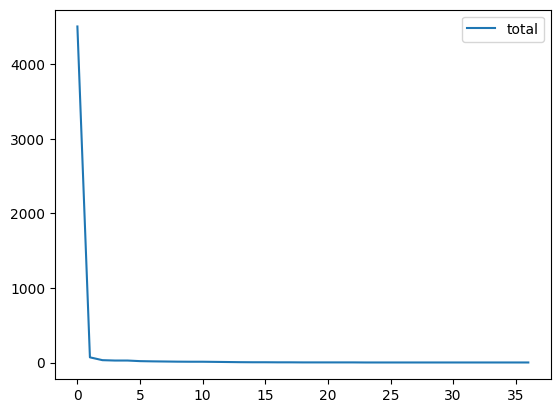

In [266]:
contagem_de_lingua.plot()

Precisamos de um gráfico que destaque as diferenças de tamanho entre as línguas. Nesse caso, os gráficos de barra são ideais para esse propósito.

<Axes: xlabel='original_language', ylabel='total'>

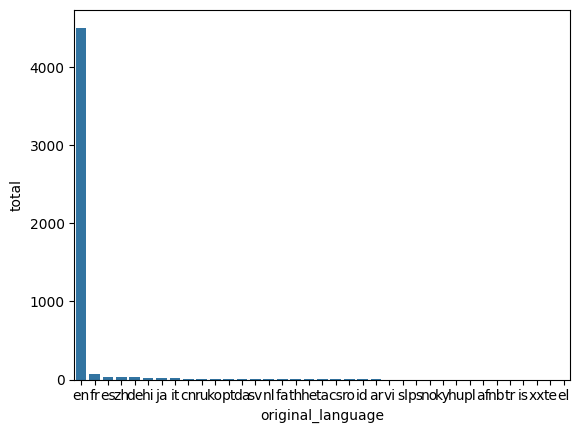

In [267]:
sns.barplot(data = contagem_de_lingua, x="original_language", y="total")

### Facilidade com o Seaborn
Porém, podemos nos perguntar: será que o Seaborn não consegue lidar diretamente com colunas categóricas? Por exemplo, a coluna original_language do tmdb.

<Axes: xlabel='original_language', ylabel='count'>

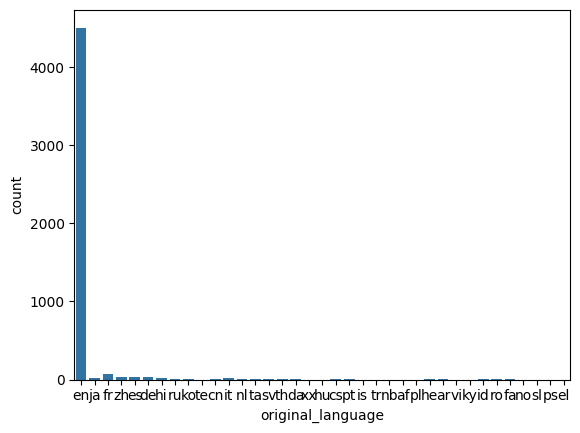

In [268]:
sns.countplot(data=tmdb, x="original_language")

## Conclusão e próximos passos
Perceba como o Seaborn facilita a criação de gráficos específicos para dados categóricos. Além disso, sua documentação é uma excelente fonte de informações, com exemplos de uso e tutoriais para diversas situações, como visualização de dados categóricos. À medida que exploramos esses recursos, podemos descobrir maneiras eficientes de apresentar e analisar informações em nossos dados.

# Aula 4 - Atividade 4 - Passando uma mensagem através de visualização

### Explorando o gráfico de pizza
Ao buscar por "pie chart" (gráfico de torta) no Seaborn, não o encontramos na documentação. Porém, encontramos na [documentação do Matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html). Vamos investigar.

Vamos usar o tipo pie, que o Pandas também oferece. Queremos pegar nossa contagem de línguas e plotá-la como um gráfico de pizza utilizando o seguinte comando:

In [269]:
contagem_de_lingua

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


<Axes: ylabel='total'>

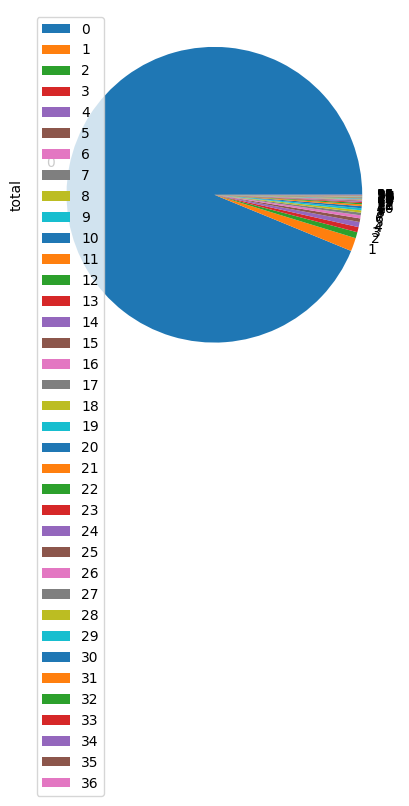

In [270]:
contagem_de_lingua.plot(kind="pie", y="total")

Note que ele colocou as cores da legenda como números (0, 1, 2, 3...), o que está incorreto. As labels (rótulos) deveriam ser a coluna original_language, do dataframe contagem_de_lingua. Vamos tentar novamente.

<Axes: ylabel='total'>

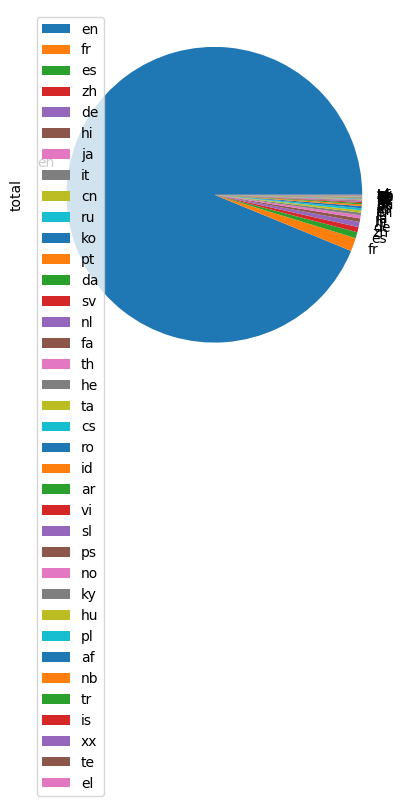

In [271]:
contagem_de_lingua.plot(kind="pie", y="total", labels=contagem_de_lingua["original_language"])

Note que é um gráfico confuso, difícil de ler. Ele está comunicando que o inglês é muito maior do que o resto, assim como o gráfico de barras. O problema é que o resto é praticamente ilegível, porque as legendas das fatias estão amontoadas, não sendo possível distingui-las.

Mas perceba uma coisa: no gráfico de barras, conseguimos perceber que, por exemplo, francês possui um dado pequeno, não é? Conseguimos, comparando as barras, afirmar, por exemplo, que uma barra é metade do tamanho de outra. Se uma barra tem metade do tamanho da outra, nós, como seres humanos, conseguimos perceber isso.

Porém, no gráfico de pizza estamos falando de área. A área de um círculo envolve π (Pi) e aí temos que comparar a área das fatias, o que é significativamente mais difícil, especialmente quando temos dados muito pequenos e parecidos.

### Separando dados de filmes em inglês

In [272]:
total_por_lingua = tmdb["original_language"].value_counts()
total_de_ingles = total_por_lingua.loc["en"]
total_de_ingles

4505

In [273]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_geral, total_de_ingles, total_do_resto)

4803 4505 298


### Preparação de dados para gráfico de barras

In [274]:
dados = {
  "lingua" : ["ingles", "outros"],
  "total" : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


### Comparando gráficos:

### Dados no gráfico de barras

Agora, queremos usar o Seaborn (sns) para fazer um gráfico de barras (barplot()). O conjunto de dados é dados, o eixo x será lingua (que representa os dados em inglês), e o eixo y será total.

<Axes: xlabel='lingua', ylabel='total'>

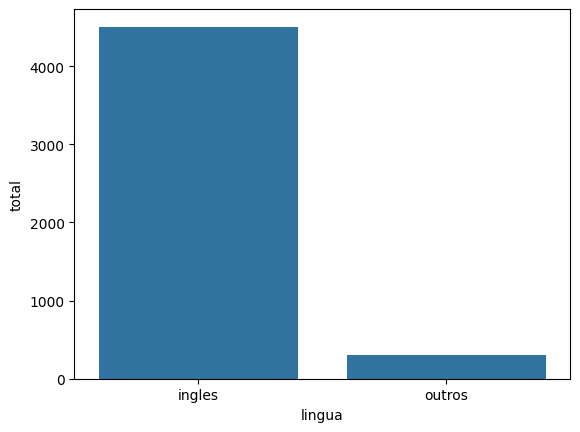

In [275]:
sns.barplot(data=dados, x="lingua", y="total")

### Dados no gráfico de pizza

<Axes: ylabel='total'>

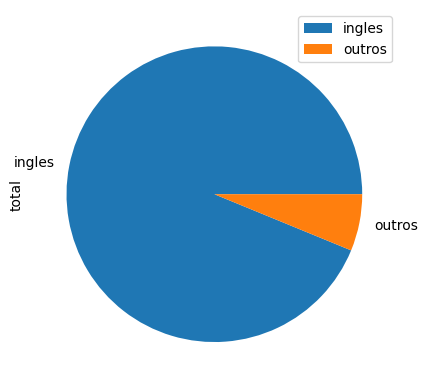

In [276]:
dados.plot(kind="pie", y="total", labels=dados["lingua"])

### Conclusão e próximos passos
É realmente pouco comum que um gráfico de pizza seja a melhor opção. É uma escolha rara. Isso sugere que se alguém sente a necessidade de recorrer a um gráfico de pizza, provavelmente não é a abordagem mais adequada. Embora um gráfico de pizza possa parecer inicialmente uma escolha intuitiva, ao explorarmos, perceberemos que existem alternativas mais eficazes.

# Aula 4 - Atividade 7 - Interpretando o propósito de uma visualização

### Análise dos filmes em outros idiomas

In [277]:
tmdb.query("original_language != 'en'").head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2016-07-29,77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://www.asterixauxjeuxolympiques.com/index.php,2395,"[{""id"": 271, ""name"": ""competition""}, {""id"": 12...",fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Gam...,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2008-01-13,132900000,116.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Asterix at the Olympic Games,5.0,471
317,94000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",http://www.theflowersofwarmovie.com/,76758,"[{""id"": 173251, ""name"": ""forced prostitution""}...",zh,金陵十三釵,A Westerner finds refuge with a group of women...,12.516546,"[{""name"": ""Beijing New Picture Film Co. Ltd."",...","[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2011-12-15,95311434,145.0,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,The Flowers of War,7.1,187
474,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",NaN,330770,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 658, ""na...",fr,Évolution,11-year-old Nicolas lives with his mother in a...,3.300061,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2015-09-14,0,81.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,Evolution,6.4,47
492,8000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 16, ""nam...",NaN,293644,"[{""id"": 209714, ""name"": ""3d""}]",es,Don Gato: El inicio de la pandilla,Top Cat has arrived to charm his way into your...,0.719996,"[{""name"": ""Anima Estudios"", ""id"": 9965}, {""nam...","[{""iso_3166_1"": ""IN"", ""name"": ""India""}, {""iso_...",2015-10-30,0,89.0,[],Released,NaN,Top Cat Begins,5.3,9


### Contagem dos filmes por língua

In [278]:
tmdb.query("original_language != 'en'")["original_language"].value_counts().head()

original_language
fr    70
es    32
zh    27
de    27
hi    19
Name: count, dtype: int64

In [279]:
total_de_outros_filmes_por_lingua = tmdb.query("original_language != 'en'")["original_language"].value_counts()
total_de_outros_filmes_por_lingua.head()

original_language
fr    70
es    32
zh    27
de    27
hi    19
Name: count, dtype: int64

### Plotagem do gráfico

<Axes: xlabel='original_language', ylabel='count'>

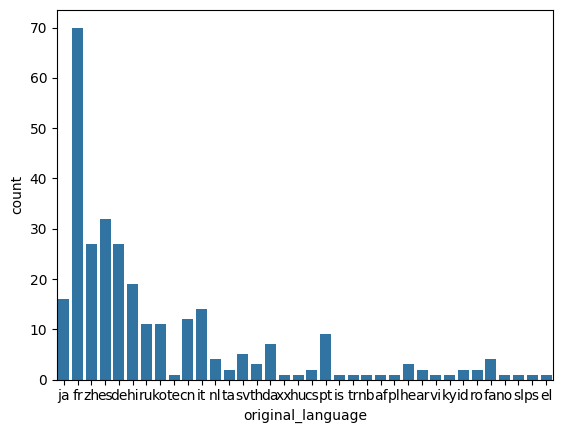

In [280]:
sns.countplot(data=tmdb.query("original_language != 'en'"),
              x="original_language")

### Conclusão e próximos passos
Note que o francês está no topo e as barras destacam claramente a diferença entre os idiomas. Assim, alcançamos nosso objetivo de mostrar que, para os outros idiomas, há uma distribuição mais diversificada, embora alguns idiomas tenham mais filmes do que outros.

No entanto, a ordenação dessas barras está ruim. Então, embora o gráfico cumpra o propósito de mostrar a distribuição dos idiomas não ingleses, fica claro que ordenar essas barras é essencial. Como devemos ordená-las? Alfabeticamente ou por ordem decrescente? Vamos discutir e analisar isso nas próximas aulas.

# Aula 5 - Atividade 3 Refinando uma visualização

Continuando, nosso próximo passo agora é analisar o gráfico de barras que está contando uma história para nós. Ele indica que o francês é a língua mais falada como língua original nos filmes que foram filtrados no TMDB 5000.

No entanto, isso é difícil de localizar. Em um gráfico ou visualização, existem diversos tipos de componentes importantes, como o tamanho, a forma, seja arredondada ou reta. A sequência, da esquerda para a direita, ou seja, uma ordem, é importante. O texto, a legenda, os números, tudo isso é importante para nós.

Portanto, será valioso ordenar, pois tudo isso ajuda a contar a história que queremos. Nesse caso, a história que queremos contar é que o francês está em primeiro lugar.

Queremos o mesmo gráfico de antes, então, copiamos o mesmo bloco de código e colamos em um novo. Feito isso, na linha abaixo da vírgula, passaremos um parâmetro.

Precisamos passar nossa ordem, primeiro são as letras FR. Mas, já temos o total_de_outros_filmes_por_lingua ordenado. Então, passamos order=total_de_outros_filmes_por_lingua seguido de .index. Feito isso, rodamos o código.

c:\Users\orlan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\orlan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\orlan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

<Axes: xlabel='original_language', ylabel='count'>

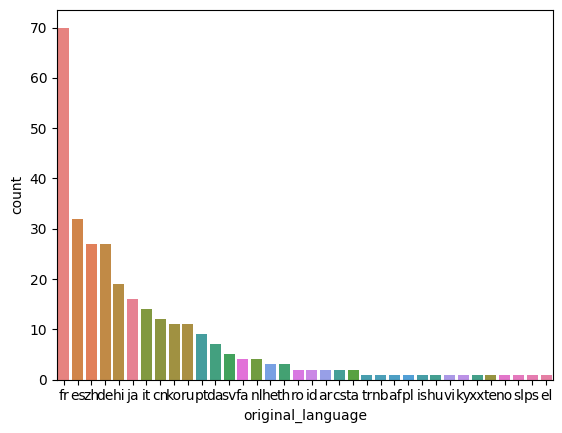

In [281]:
sns.countplot(data=tmdb.query("original_language != 'en'"),
              order=total_de_outros_filmes_por_lingua.index,
              hue="original_language",
              x="original_language")

## Trabalhando com cor

### Colorindo o gráfico com hue

c:\Users\orlan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\orlan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\orlan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

<Axes: xlabel='original_language', ylabel='count'>

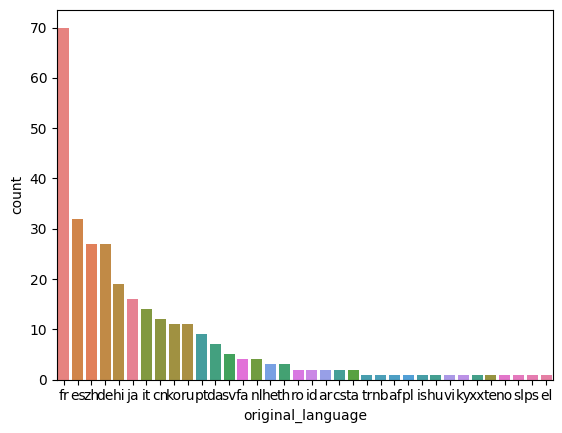

In [282]:
sns.countplot(data=tmdb.query("original_language != 'en'"),
              order=total_de_outros_filmes_por_lingua.index,
              hue="original_language",
              x="original_language")

c:\Users\orlan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\orlan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\orlan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

<Axes: xlabel='original_language', ylabel='count'>

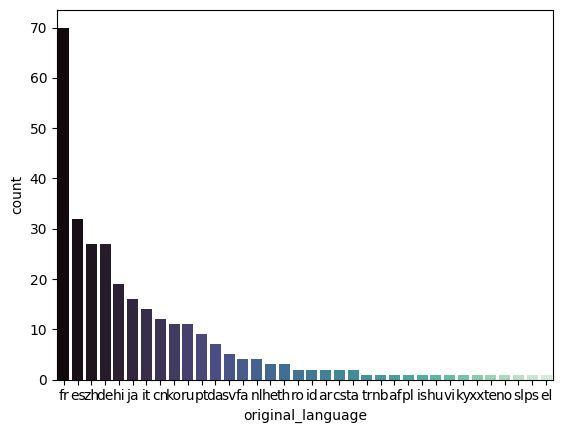

In [283]:
sns.countplot(data=tmdb.query("original_language != 'en'"),
              order=total_de_outros_filmes_por_lingua.index,
              palette="mako",
              hue="original_language",
              hue_order=total_de_outros_filmes_por_lingua.index,
              x="original_language")

c:\Users\orlan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\orlan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\orlan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

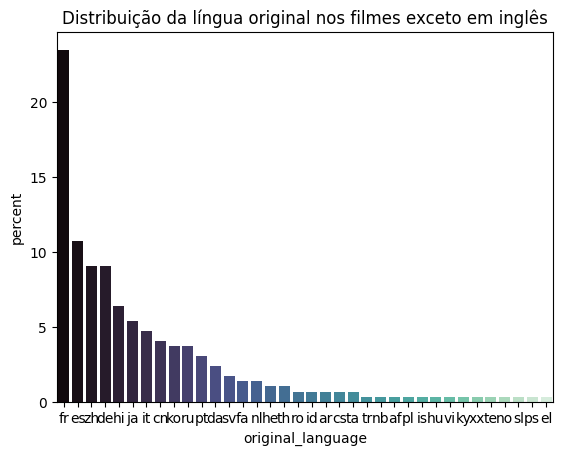

In [284]:
sns.countplot(data=tmdb.query("original_language != 'en'"),
              order=total_de_outros_filmes_por_lingua.index,
              palette="mako",
              hue="original_language",
              hue_order=total_de_outros_filmes_por_lingua.index,
              stat="percent",
              x="original_language")
plt.title("Distribuição da língua original nos filmes exceto em inglês")
plt.show()

In [285]:
tmdb.query("original_language != 'en'")["original_language"].value_counts(normalize=True)

original_language
fr    0.234899
es    0.107383
zh    0.090604
de    0.090604
hi    0.063758
ja    0.053691
it    0.046980
cn    0.040268
ko    0.036913
ru    0.036913
pt    0.030201
da    0.023490
sv    0.016779
fa    0.013423
nl    0.013423
he    0.010067
th    0.010067
ro    0.006711
id    0.006711
ar    0.006711
cs    0.006711
ta    0.006711
tr    0.003356
nb    0.003356
af    0.003356
pl    0.003356
is    0.003356
hu    0.003356
vi    0.003356
ky    0.003356
xx    0.003356
te    0.003356
no    0.003356
sl    0.003356
ps    0.003356
el    0.003356
Name: proportion, dtype: float64

c:\Users\orlan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\orlan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\orlan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

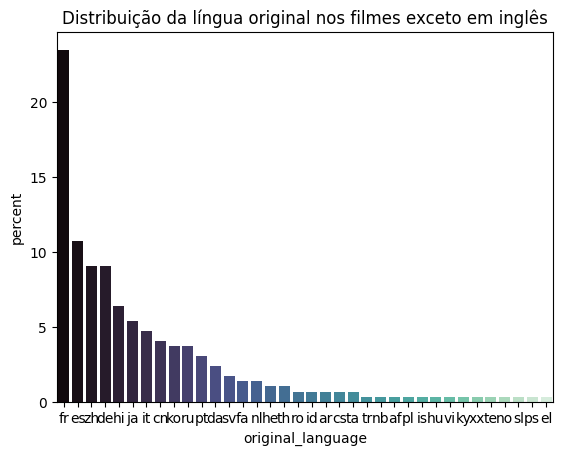

In [286]:
sns.countplot(data=tmdb.query("original_language != 'en'"),
              order=total_de_outros_filmes_por_lingua.index,
              palette="mako",
              hue="original_language",
              hue_order=total_de_outros_filmes_por_lingua.index,
              stat="percent",
              x="original_language")
plt.title("Distribuição da língua original nos filmes exceto em inglês")
plt.show()

c:\Users\orlan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\orlan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\orlan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

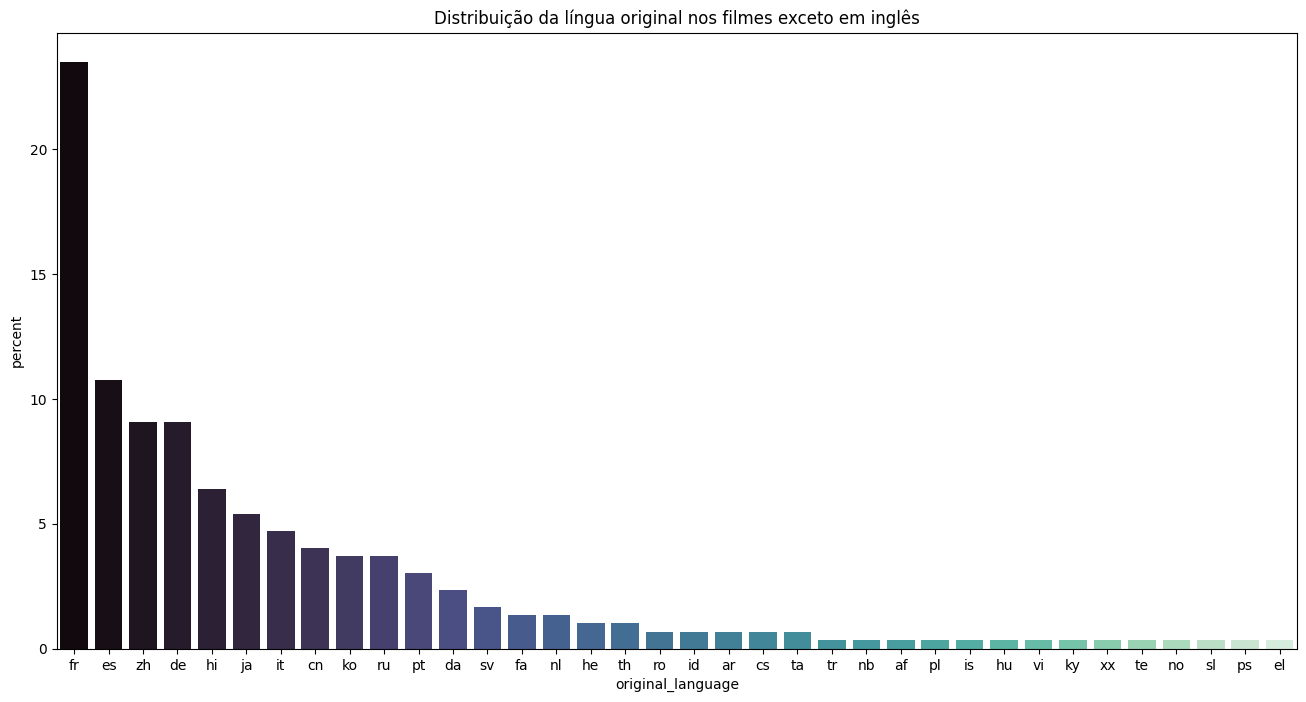

In [287]:
plt.figure(figsize=(16, 8))
sns.countplot(data=tmdb.query("original_language != 'en'"),
              order=total_de_outros_filmes_por_lingua.index,
              palette="mako",
              hue="original_language",
              hue_order=total_de_outros_filmes_por_lingua.index,
              stat="percent",
              x="original_language")
plt.title("Distribuição da língua original nos filmes exceto em inglês")
plt.show()

# Aula 6 - Atividade 2 Medidas de tendência central e desvio padrão

Continuando, nossa ideia agora é prosseguir com o processo de exploração.

Surgiu uma nova questão.

Lembram do filmes.head, que traz os cinco primeiros filmes? Como parâmetro, podemos passar um número, como 2, e trazer apenas os dois primeiros.

In [288]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


Extraindo as notas dos dois filmes em variáveis distintas

In [289]:
# prompt: extraia as notas dos dois filmes em variáveis distintas

filme1_nota = notas.query("filmeId==1") ["nota"].mean()
filme2_nota = notas.query("filmeId==2")["nota"].mean()

In [290]:
#prompt: extraia as notas dos dois filmes em variáveis distintas

notas_do_toy_story = notas.query("filmeId==1")["nota"]
notas_do_jumanji = notas.query("filmeId==2")["nota"]

media_do_toy_story = notas_do_toy_story.mean()
media_do_jumanji = notas_do_jumanji.mean()

print(media_do_toy_story, media_do_jumanji)


3.9209302325581397 3.4318181818181817


In [291]:
import numpy as np

filme1 = [2.5] * 10 + [3.5] * 10
np.mean (filme1)

3.0

In [292]:
filme2 = [5] * 10 + [1] * 10
np.mean (filme2)

3.0

Imprimindo a média e mediana do filme 1 e filme 2


In [293]:
media_filme1 = np.mean (filme1)
mediana_filme1 = np.median (filme1)

media_filme2 = np.mean (filme2)
mediana_filme2 = np.median (filme2)

print("Filme 1:")
print("Média:", media_filme1)
print("Mediana:", mediana_filme1)

print("\nFilme 2:")
print("Média:", media_filme2)
print("Mediana:", mediana_filme2)

Filme 1:
Média: 3.0
Mediana: 3.0

Filme 2:
Média: 3.0
Mediana: 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

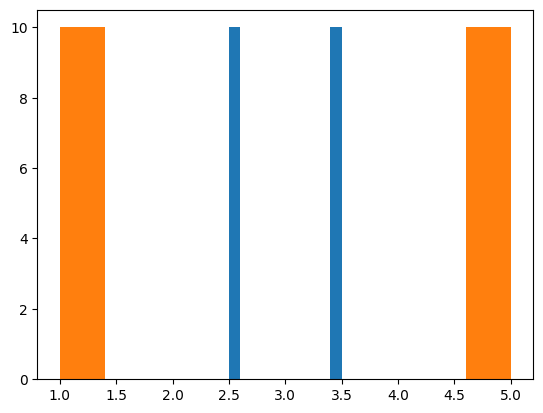

In [294]:
plt.hist(filme1)
plt.hist(filme2)

{'whiskers': [<matplotlib.lines.Line2D at 0x2c8bcf507d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2c8bcf50c80>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c8bcf50530>,
 'medians': [<matplotlib.lines.Line2D at 0x2c8bcf51130>,
 'fliers': [<matplotlib.lines.Line2D at 0x2c8bcf51400>,
 'means': []}

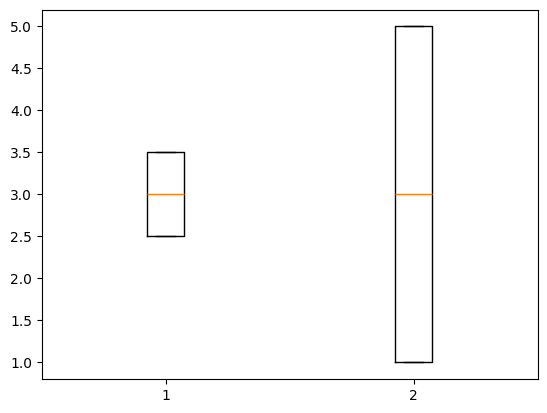

In [295]:
plt.boxplot([filmes1, filme2])

### Desvio padrão 10:40
Vamos acessar a página da [Wikipedia sobre desvio padrão (standart deviation)](https://en.wikipedia.org/wiki/Standard_deviation).

Em português ela vai pras fórmulas direto, mas a versão em inglês tem um exemplo bacana, que ela mostra pra gente como que esse desvio é calculado.

Então ela dá uma tabelinha pra gente, como por exemplo, os seguintes números, 2, 4, 4, 4, 5, 5, 7, 9. E ela calcula a média, a média deu 5.

Depois, ele fala que pra gente calcular o quanto desviou do número 5, vamos verificar as notas.

Quanto que desviou a primeira nota? o 2 de 5? 2 e 5 desviou 3. a distância de 2 e 5 é 3. E o mesmo com as outras notas:

2 e 5, desvio é de 3
4 e 5, desvio é de 1
4 e 5, desvio é de 1
4 e 5, desvio é de 1
5 e 5, desvio é de 0
5 e 5, desvio é de 0
7 e 5, desvio é de 2
9 e 5, desvio é de 4

Então você faz o que? Você vai para cada uma das notas, cada um dos números e calcula a diferença com a média. Isso é o quanto desviou, o quanto você fugiu da média em cada uma dessas notas.

Mas tem que tomar um cuidado. Porque o desvio para menos, se eu desviei para menos, isso fica -3 e eu desviei para mais, +3, eles não podem se anular, porque senão eles iam fingir que o desvio era 0 e não é, o desvio de -3 com o desvio de +3 piora a minha situação de desvio, ele não se anula.

Então existe uma sacada matemática aqui que eles fazem assim: para a gente tirar o menos de tudo, para não ter o menos, eleva ao quadrado:

(2-5)² = (-3)² = 9
(4-5)²(-1)² = 1
(4-5)²(-1)²= 1
(4-5)²(-1)² = 1
(5-5)² = 0² = 0
(5-5)² = 0² = 0
(7-5)² = 2² = 4
(9-5)² = 4² = 16

Dessa forma, todas as diferenças são positivas.

Então quanto mais você está longe da média, maior esse número, não só isso. Se você está longe, é longe ao quadrado, que é um número muito maior.

Então quanto mais você foge da média, maior será esse desvio de forma quadrática.

E no final você tira uma raiz quadrada disso, no final você tira a raiz quadrada para tirar esse impacto do quadrado.

Essa fórmula de desvio padrão é usada direto em diversas situações.

In [296]:
import numpy as np

filme0 = [3.0] * 20  # espalha 0
np.mean(filme0)


3.0

In [297]:
np.std(filme0), np.std(filme1), np.mean(filme2)


(0.0, 0.5, 3.0)

## Para saber mais: desvio padrão

O desvio padrão é uma medida estatística que indica a dispersão ou variabilidade dos dados em relação à média. Ele representa o quão distantes os valores individuais estão da média do conjunto de dados. Quanto maior o desvio padrão, maior é a dispersão dos dados em torno da média; e quanto menor, menor é a dispersão.

O desvio padrão auxilia na compreensão da variabilidade de um conjunto de dados e avalia o quão representativa é a média. Ele nos fornece uma medida da consistência ou inconsistência dos dados em relação à média e é comumente utilizado para medir a confiança e a margem de erro em cálculos estatísticos, que você aprenderá um pouco mais nos próximos cursos da formação.

Vamos para um exemplo?
Podemos notar o comportamento do desvio padrão observando o código abaixo que cria um DataFrame que contém a quantidade de visitas em um website por dia da semana em duas semanas:



In [298]:
import pandas as pd
import numpy as np

# Criando DataFrame de exemplo

dados = np.array([[100, 120, 90, 110, 130], [80, 150, 70, 140, 60]])

df = pd.DataFrame(dados, index = ["Semana 1", "Semana 2"],
                  columns= ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"])

# Calculando o desvio padrão das visitas por semana
desvio_padrao_semana1 = df.loc["Semana 1"].std()
desvio_padrao_semana2 = df.loc["Semana 2"].std()

print(df)
print("\nDesvio Padrão da Semana 1:", desvio_padrao_semana1.round(2))
print("Desvio Padrão da Semana 2:", desvio_padrao_semana2.round(2))

          Segunda  Terça  Quarta  Quinta  Sexta
Semana 1      100    120      90     110    130
Semana 2       80    150      70     140     60

Desvio Padrão da Semana 1: 15.81
Desvio Padrão da Semana 2: 41.83


Lendo a resposta gerada pelo código, percebemos que o desvio padrão da Semana 2 foi maior que o da Semana 1. Por quê? Sabendo que estamos trabalhando com dados de uma mesma natureza (quantidade de visitas), isso indica que possuímos uma maior dispersão dos dados de visitas na Semana 2 em relação à média semanal (100 visitas), enquanto que na Semana 1 possuímos uma menor dispersão da quantidade de visitas de acordo com a mesma semana (110 visitas).

Trazendo para ciência de dados, podemos interpretar que houve maior instabilidade ou flutuação no número de visitas em diferentes dias da semana na Semana 2, o que pode aumentar o interesse em analisar o que pode ter ocorrido e como planejar um maior engajamento para a semana inteira.

# Aula 6 - Atividade 5 Analisando a distribuição das notas dos filmes

{'whiskers': [<matplotlib.lines.Line2D at 0x2c8bbb39790>,
 'caps': [<matplotlib.lines.Line2D at 0x2c8bce6e720>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c8bbb3a3c0>,
 'medians': [<matplotlib.lines.Line2D at 0x2c8bce8a930>,
 'fliers': [<matplotlib.lines.Line2D at 0x2c8bcf75be0>,
 'means': []}

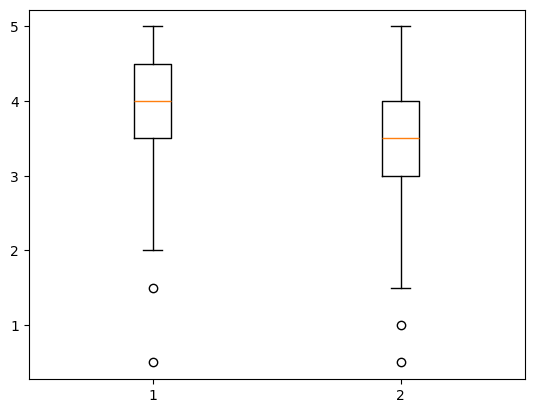

In [299]:
plt.boxplot([notas_do_toy_story, notas_do_jumanji])

c:\Users\orlan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='filmeId', ylabel='nota'>

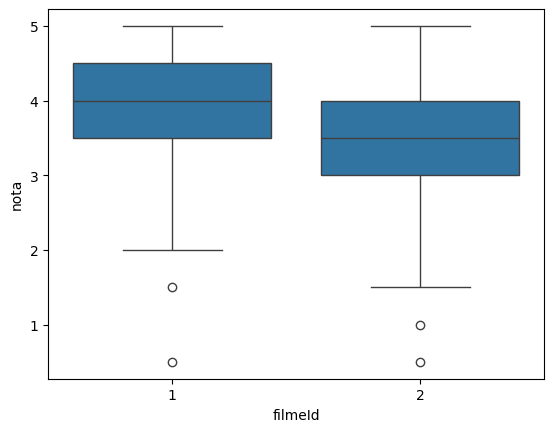

In [300]:
sns.boxplot(data=notas.query("filmeId in [1,2]"),
            x="filmeId",
            y="nota")

C:\Users\orlan\AppData\Local\Temp\ipykernel_6336\1204207568.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=notas.query("filmeId in [1,2,3,4,5]"),
c:\Users\orlan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\orlan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\orlan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base

<Axes: xlabel='filmeId', ylabel='nota'>

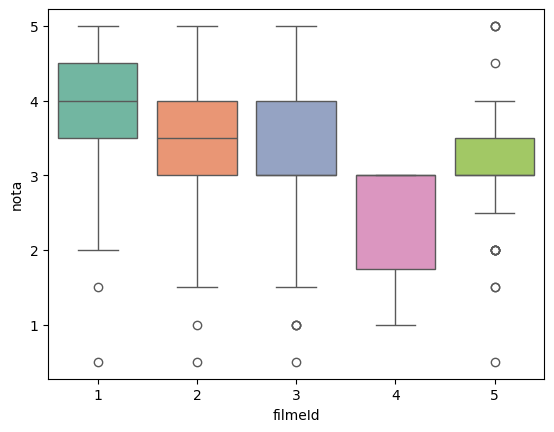

In [301]:
sns.boxplot(data=notas.query("filmeId in [1,2,3,4,5]"),
            x="filmeId",
            y="nota",
            palette="Set2")

In [302]:
print(notas.columns)


Index(['usuarioId', 'filmeId', 'nota', 'momento'], dtype='object')


In [303]:
notas["filmeId"].value_counts().tail()


filmeId
86279     1
86922     1
5962      1
87660     1
163981    1
Name: count, dtype: int64

In [306]:
notas.groupby("filmeId").count()

,usuarioId,nota,momento
filmeId,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1


In [307]:
notas.groupby("filmeId").count().query("nota == 1")

,usuarioId,nota,momento
filmeId,,,
49,1,1,1
55,1,1,1
77,1,1,1
83,1,1,1
96,1,1,1
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1
